**Real-Time Communication System Powered by AI for Specially Abled Project**

In [1]:
pwd

'/home/wsuser/work'

In [7]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='11Ftjb9KIpaRjC6KoIY_X1SD8OX5mJ3Vl0KkfIcA8YeX',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'realtimecommunicationsystempowere-donotdelete-pr-apwalp2mqqopyh'
object_key = 'conversation engine for deaf and dumb.zip'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [8]:
ls

In [9]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_2.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [10]:
ls

Dataset/



**Image Preprocessing**

**Import ImageDataGenerator Library And Configure It**

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [13]:
test_datagen=ImageDataGenerator(rescale=1./255)

**Apply ImageDataGenerator Functionality To Train And Test Set**

In [14]:
x_train=train_datagen.flow_from_directory(r"/home/wsuser/work/Dataset/training_set",target_size=(64,64),
                                          class_mode="categorical",batch_size=30)

Found 15750 images belonging to 9 classes.


In [15]:
x_test=test_datagen.flow_from_directory(r"/home/wsuser/work/Dataset/test_set",target_size=(64,64),
                                                            class_mode="categorical",batch_size=30)

Found 2250 images belonging to 9 classes.


**Model Building**

**Import The Required Model Building Libraries**

In [16]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

**Initialize The Model**

In [17]:
model=Sequential()

**Add The Convolution Layer**

In [18]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))
#No of feature detectors, size of feature detector, image size, activation function

**Add The Pooling Layer**

In [19]:
model.add(MaxPooling2D(pool_size=(2,2)))

**Add The Flatten Layer**

In [20]:
model.add(Flatten())

**Adding The Dense Layers**

In [21]:
model.add(Dense(200,activation='relu'))

In [22]:
model.add(Dense(200,activation='relu'))

In [23]:
model.add(Dense(9,activation="softmax"))

**Compile The Model**

In [24]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')

In [25]:
len(x_train)

525

In [26]:
len(x_test)

75

**Fit And Save The Model**
Fit the neural network model with the train and test set, number of epochs, and validation steps.
The weights are to be saved for future use. The weights are saved in signlanguage.h5 file using save().

In [27]:
model.fit(x_train,epochs=9,validation_data=x_test,steps_per_epoch=len(x_train),validation_steps=len(x_test))

Epoch 1/9
525/525 [==============================] - 79s 150ms/step - loss: 0.0616 - accuracy: 0.9814 - val_loss: 0.1994 - val_accuracy: 0.9729
Epoch 3/9
525/525 [==============================] - 78s 149ms/step - loss: 0.0357 - accuracy: 0.9890 - val_loss: 0.2510 - val_accuracy: 0.9636
Epoch 4/9
525/525 [==============================] - 78s 148ms/step - loss: 0.0307 - accuracy: 0.9904 - val_loss: 0.2519 - val_accuracy: 0.9680
Epoch 5/9
525/525 [==============================] - 78s 149ms/step - loss: 0.0258 - accuracy: 0.9922 - val_loss: 0.2567 - val_accuracy: 0.9547
Epoch 6/9
525/525 [==============================] - 79s 151ms/step - loss: 0.0216 - accuracy: 0.9931 - val_loss: 0.1626 - val_accuracy: 0.9680
Epoch 7/9
525/525 [==============================] - 78s 149ms/step - loss: 0.0152 - accuracy: 0.9950 - val_loss: 0.2975 - val_accuracy: 0.9756
Epoch 8/9
525/525 [==============================] - 78s 148ms/step - loss: 0.0157 - accuracy: 0.9945 - val_loss: 0.2308 - val_accuracy:

In [28]:
model.save("signlanguage.h5")

**IBM DEPLOYMENT**

In [29]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 21.8 MB/s eta 0:00:01


In [30]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"ZXaaoF395WmOie3TWtGtpjlOHe9FZvdBEOPzTOWWe5if"
}

client=APIClient(wml_credentials)

In [31]:
client

In [37]:
def guid_space_name(client,realproject_deploy):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==realproject_deploy)['metadata']['id'])

In [38]:
space_uid=guid_space_name(client,'realproject_deploy')
print("Space UID "+space_uid)

Space UID 20e98e1e-a8d0-414f-a93d-6ff03e8d804f


In [43]:
#creating a default deployment space
client.set.default_space(space_uid)

'SUCCESS'

In [44]:
client.software_specifications.list(200)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [45]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [46]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [48]:
ls

Dataset/  signlanguage.h5


In [49]:
!tar -zcvf signlanguage-model.tgz signlanguage.h5

signlanguage.h5


In [50]:
ls

Dataset/  signlanguage.h5  signlanguage-model.tgz


In [51]:
#to store the model
model_details=client.repository.store_model(model='signlanguage-model.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Model Building",
    client.repository.ModelMetaNames.TYPE:'tensorflow_2.7',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [52]:
model_id=client.repository.get_model_id(model_details)

In [53]:
model_id

'6916f493-f888-4ca5-ade3-21a0f277aa26'

In [54]:
#to use this model in our system , we can download the model and use
client.repository.download(model_id,'signlanguage.tar.gb')

Successfully saved model content to file: 'signlanguage.tar.gb'


'/home/wsuser/work/signlanguage.tar.gb'

In [55]:
ls

Dataset/  signlanguage.h5  signlanguage-model.tgz  signlanguage.tar.gb


**Test The Model**

**Import The Packages And Load The Saved Model**

In [2]:
from keras.models import load_model
import numpy as np
import cv2

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 
import numpy as np

In [4]:
model=load_model("signlanguage.h5")


**Load The Test Image, Pre-Process It And Predict**

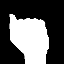

In [5]:
img=image.load_img("16.png",target_size=(64,64))
img

In [6]:
type(img)

PIL.Image.Image

In [7]:
x = image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [8]:
x.shape

(64, 64, 3)

In [9]:
x = np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 3)

In [10]:
pred_prob = model.predict(x)

1/1 [==============================] - 1s 1s/step


In [11]:
pred_prob

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
class_name=["A","B","C","D","E","F","G","H","I"]
pred_id = pred_prob.argmax(axis=1)[0]

In [13]:
pred_id

0

In [14]:
print("the alphabet is  ",str(class_name[pred_id]))

the alphabet is   A
